<CENTER>
    <a href="http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html" class="icons"><img src="../../images/ATLASOD.gif" style="width:40%"></a>
</CENTER>

<CENTER><h1>Buscando el bosón de Higgs en el canal H→γγ</h1></CENTER>

¡Bienvenidos, cazadores de partículas! En este notebook, estamos buscando el bosón de Higgs en el canal de desintegración difotónico (γγ) utilizando los datos abiertos de ATLAS (similar a este [paper](https://cds.cern.ch/record/2255269?ln=en) y otros ejemplos [aquí](https://opendata.atlas.cern/docs/documentation/example_analyses/analysis_examples_education_2020/)). Pero, ¿qué es exactamente este bosón de Higgs? Es una partícula fundamental en el Modelo Estándar (ME) de la física de partículas, que explica cómo las partículas adquieren masa. El ME describe cómo todo está hecho de 12 tipos diferentes de partículas de materia (fermiones), interactuando con 3 de las 4 fuerzas fundamentales que tienen sus correspondientes partículas mediadoras de interacción (bosones), todo unido por el bosón de Higgs.
<CENTER><img src="../../images/Modelo_standard_particulas_subatómicas.png" style="width:30%"></CENTER>

El bosón de Higgs fue descubierto en 2012 por los experimentos ATLAS y CMS en el Gran Colisionador de Hadrones (LHC). El bosón de Higgs se desintegra instantáneamente en varias partículas después de ser producido, incluyendo dos fotones (H→γγ). Este modo de desintegración, aunque raro, proporciona una señal limpia y distintiva debido a la medición precisa de las energías de los fotones.

<CENTER><img src="../../images/HiggsDecays.png" style="width:30%"></CENTER>

Si quieres leer más sobre este descubrimiento, aquí tienes unas referencias:

[Observación del Higgs (2012)](https://www.sciencedirect.com/science/article/pii/S037026931200857X)

[Un poco de historia](https://www.europhysicsnews.org/articles/epn/abs/2019/05/epn2019505-6p24/epn2019505-6p24.html)

[Modos de decaimiento](https://www.nature.com/articles/s41586-022-04893-w)

Vamos a utilizar la muestra de datos abiertos de ATLAS a 13 TeV para crear un histograma. Pero primero, familiaricémonos con el entorno computacional.

# Sobre Jupyter Notebooks and ROOT

## ¿Qué es un Jupyter Notebook?

Un Jupyter Notebook es una herramienta interactiva donde puedes escribir y ejecutar código, añadir explicaciones e incluir visualizaciones, todo en un solo documento. Es la página en la que te encuentras ahora, lo que te permite mezclar programación con texto descriptivo y ver los resultados al instante.

Si deseas obtener más información, por favor visita: https://jupyter.org/

## ¿Qué es ROOT?

ROOT es un sistema desarrollado por el CERN para analizar grandes cantidades de datos científicos. Proporciona herramientas para crear histogramas y gráficos, ajustar curvas, realizar análisis estadísticos y manejar álgebra de matrices. También soporta cálculos con cuatro-vectores, funciones matemáticas estándar y análisis multivariado, incluyendo redes neuronales. ROOT facilita la generación de archivos en varios formatos gráficos e integra código Python y generadores de eventos de Monte Carlo.

Una característica clave de ROOT es su contenedor de datos llamado "árbol", que actúa como una ventana deslizante sobre los datos crudos almacenados en un archivo. Los árboles permiten un acceso eficiente a los datos, manejando problemas de asignación de memoria y almacenamiento en búfer de manera transparente.

El 4 de julio de 2012, los experimentos de ATLAS utilizaron ROOT para crear todos los gráficos presentados en la búsqueda del bosón de Higgs, destacando su importancia en el análisis de datos científicos a gran escala. ¡Es la herramienta que también estaremos usando aquí! Para más documentación: https://root.cern/about/

**Nota**: Si necesitas instalar alguno de los programas o herramientas necesarios, por favor consulta: https://github.com/whyyorlantaken/ATLAS-Open-Data-Challenge

- En inglés: https://github.com/whyyorlantaken/ATLAS-Open-Data-Challenge/blob/main/Software%20setup/installation.md
- En español: https://github.com/whyyorlantaken/ATLAS-Open-Data-Challenge/blob/main/Software%20setup/instalaciones.md

Ahora, vamos directo al código.

In [13]:
import ROOT
from ROOT import TMath
import time

Este código importa la biblioteca ROOT y sus funciones matemáticas, y también importa el módulo time para operaciones relacionadas con el tiempo. Esta configuración te permite usar las herramientas de ROOT para el análisis de datos y las funciones de temporización en tu script.

In [14]:
%jsroot on

El comando %jsroot activa el modo JavaScript ROOT (JSROOT), permitiendo la visualización interactiva de gráficos y datos en un entorno web.

Cuando ejecutas %jsroot on en un cuaderno de Jupyter, habilitas la capacidad de mostrar gráficos interactivos generados por ROOT directamente en el cuaderno, utilizando tecnologías web modernas como JavaScript y HTML5. Esto permite una experiencia más dinámica y visualmente rica para explorar y analizar datos.

In [15]:
start = time.time()

El comando start = time.time() se utiliza para registrar el tiempo actual en segundos. Se usa principalmente para medir cuánto tiempo tarda en ejecutarse un fragmento de código.

In [16]:
f = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/data_A.GamGam.root")

TFile: Es una clase en ROOT que maneja archivos de ROOT. Estos archivos suelen contener grandes cantidades de datos estructurados y son usados para almacenar y acceder a datos experimentales.

Open: Es un método de la clase TFile que abre un archivo de ROOT. Puede abrir archivos locales o archivos remotos a través de una URL.

URL del archivo: "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/data_A.GamGam.root" es la ubicación del archivo de datos en la web. En este caso, es un archivo de datos accesible públicamente que contiene datos experimentales de física de partículas. Incluso puedes descargar los datos en tu computadora. 

Esta línea de código hace lo siguiente:

1. Utiliza ROOT para abrir un archivo de datos ubicado en una URL.
2. Asigna el archivo abierto a la variable f.

En otras palabras, f ahora contiene el archivo de ROOT que se puede usar para leer y analizar los datos almacenados en él.

In [17]:
canvas = ROOT.TCanvas("Canvas","cz",800,600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


Esta línea crea un lienzo (canvas) en ROOT, que es una ventana gráfica donde se pueden dibujar gráficos y visualizar datos.

ROOT.TCanvas: Es una clase en ROOT que crea un lienzo para dibujar.
"Canvas": Es el nombre interno del lienzo.
"cz": Es el título del lienzo que aparece en la ventana.
800: Es el ancho del lienzo en píxeles.
600: Es la altura del lienzo en píxeles.

En resumen, esta línea crea una ventana gráfica llamada "cz" con un tamaño de 800x600 píxeles para visualizar gráficos y datos.

In [18]:
tree = f.Get("mini")

Esta línea de código obtiene un árbol de datos almacenado en el archivo de ROOT.

f: Es el archivo de ROOT que has abierto previamente.
Get("mini"): Es un método que se utiliza para obtener un objeto almacenado en el archivo. En este caso, obtiene un árbol de datos llamado "mini".
tree: Es la variable que almacena el árbol de datos obtenido.

Esta línea accede al árbol de datos llamado "mini" en el archivo de ROOT f y lo guarda en la variable tree para que puedas trabajar con él.

In [19]:
tree.GetEntries()

430344


La línea de código tree.GetEntries() se utiliza para obtener el número total de entradas (o eventos) en un árbol de datos en ROOT. Aquí tienes una explicación más simple:

tree: Es la variable que contiene el árbol de datos al que accediste previamente.
GetEntries(): Es un método que devuelve el número total de entradas en el árbol.
En resumen, tree.GetEntries() te dice cuántos eventos o filas de datos hay en el árbol tree.

Ahora, vamos a extraer la información sobre los fotones. 
# Acerca de la Masa Invariante: 

El Gran Colisionador de Hadrones (LHC) en el CERN acelera protones a velocidades cercanas a la luz y luego los hace colisionar. Estas colisiones de alta energía producen una variedad de partículas, incluyendo el bosón de Higgs. Detectores que rodean los puntos de colisión, como ATLAS y CMS, registran las trayectorias, energías y otras propiedades de estos productos de desintegración de estas colisiones. A menudo usamos la masa invariante para identificar estas partículas. La masa invariante es una cantidad calculada a partir de la energía y el momento de dos partículas (en este caso, dos fotones) y permanece constante independientemente del marco de referencia. Cuando dos fotones se producen a partir de la desintegración de un bosón de Higgs, su masa invariante debería alcanzar un pico alrededor de la masa del bosón de Higgs (aproximadamente 125 GeV).

In [20]:
hist = ROOT.TH1F("h_M_Hyy","Diphoton invariant-mass ; Invariant Mass m_{yy} [GeV] ; events",30,105,160)


Esta línea de código define un histograma en ROOT.

ROOT.TH1F: Es una clase en ROOT para crear histogramas unidimensionales (1D).

Este código crea un histograma 1D con:

    Nombre: h_M_Hyy
    Título: Diphoton invariant-mass
    Etiqueta del eje x: Invariant Mass m_{yy} [GeV]
    Etiqueta del eje y: events
    Número de bins: 30
    Rango del eje x: Desde 105 GeV hasta 160 GeV

El histograma se utilizará para visualizar la distribución de la masa invariante de pares de fotones (diphotones) en ese rango de masas.

## ¿Cómo calcular esta masa invariante?

Hablemos de cómo calculamos la masa invariante. Utilizamos el momento transversal ($p_T$), la pseudorapidez ($\eta$) y el ángulo polar $\theta$. El momento transversal ($p_T$) es la componente del momento de una partícula perpendicular al eje del haz. Un mayor momento transversal generalmente indica partículas más energéticas. Se calcula usando la siguiente ecuación:

$$ p_T = \sqrt{p_x^2 + p_y^2} $$

donde $\theta$ es el ángulo polar de la partícula con respecto al eje del haz. La pseudorapidez ($\eta$) es una coordenada espacial que describe el ángulo de una partícula en relación con el eje del haz. Se utiliza en lugar del ángulo polar $\theta$ porque proporciona una mejor separación de partículas en colisiones de alta energía. Se define como:

$$\eta = -\ln \left( \tan \left( \frac{\theta}{2} \right) \right) $$

La masa invariante de una partícula se calcula a partir de la relación energía-momento:

$$E^2=(mc^2)^2+(pc)^2$$

Para dos fotones, la masa invariante ($m$) se da por:

$$ m = \sqrt{ 2 p_{T1} p_{T2} (\cosh(\eta_1 - \eta_2) - \cos(\phi_1 - \phi_2)) }$$

Lee más [aquí](https://link.springer.com/article/10.1007/JHEP07(2021)027) y [aquí.](https://link.springer.com/article/10.1007/JHEP07(2023)088)

# Analisis de datos: Entendiendo lo que vamos a hacer

Los datos abiertos a utilizar son proporcionados directamente por el proyecto **ATLAS Open data** del CERN, y se encuentran como samples en https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/ GamGam/Datos/. Allí encontrará algunos sets de datos en formato **.root**. Este formato es utilizado porque usaremos la librería ROOT para realizar el análisis, pero también porque tiene algunas otras ventajas como:

- **Almacenamiento eficiente**: Los archivos ROOT admiten algoritmos de compresión eficientes, que pueden reducir significativamente el tamaño del archivo y al mismo tiempo preservar la integridad de los datos. Esto es crucial para manejar grandes conjuntos de datos generados por experimentos.
- **Datos estructurales**: Los datos en este tipo de archivos se organizan en estructuras TTree, que pueden contener datos jerárquicos con ramas (columnas). Esta organización facilita el almacenamiento, la recuperación y el análisis de conjuntos de datos complejos con datos multidimensionales.
- **Interoperabilidad**: ROOT es un marco ampliamente adoptado en HEP y campos relacionados. Su formato .root se puede leer y manipular utilizando varios lenguajes de programación (C++, Python, etc.) y herramientas (el propio ROOT, PyROOT, uproot en Python, etc.), asegurando compatibilidad y facilidad de colaboración entre diferentes plataformas y equipos.

Ahora que sabemos por qué los datos se escriben de esa manera, lo que contiene el enlace son cuatro sets diferentes de datos y, del más liviano al más pesado, los archivos son

- data_A.GamGam.root ($78\,Mb$)
- data_B.GamGam.root ($277\,Mb$)
- data_C.GamGam.root ($405\,Mb$)
- data_D.GamGam.root ($655\,Mb$)

Se pueden identificar únicamente con las letras A, B, C o D.

Una vez que se ha seleccionado un set, lo siguiente que debe hacer es obtener el objeto TTree, lo que se puede hacer fácilmente con ROOT en solo una línea de código. **El objeto TTree almacena todos los eventos que se verificarán para detectar una posible descomposición del bosón de Higgs SM en dos fotones**. Para aislarlos y calcular la masa invariante, el algoritmo sigue los siguientes criterios de selección de eventos:

1. Cree los vectores TLorentz para representar los dos fotones.
2. Recorra todos los eventos y verifique si el trigger del difotón es activado, es decir, el evento implica la presencia de dos fotones. Si no es así, no tendría sentido seguir teniendo en cuenta el evento.
3. Seleccionar fotones con una identificación estricta para garantizar la calidad de los datos y la confiabilidad de las conclusiones a extraer.
4. Ahora algunos filtros cruciales: momento transversal ($p_T$) y la pseudorapidez ($\eta$). El primero garantiza que ambos fotones tengan suficientes valores de $p_T$ para indicar una señal genuina, mientras que el segundo impone un rango o límite a la pseudorapidez de las partículas aceptadas en un evento.
5. Después de verificar nuevamente los criterios de aislamiento para ambos fotones, guarde los datos de los fotones seleccionados en los dos vectores TLorentz creados anteriormente.
6. Calcule la masa invariante del par de fotones simplemente sumando los dos vectores TLorentz, que debería estar entre $105\, GeV$ y $160\, GeV$.

Lo único que queda por hacer es llenar un histograma creado anteriormente con este último resultado, ¡y deberíamos tenerlo!

Referencias: 

https://opendata.atlas.cern/docs/physics/YY/

In [21]:
Photon_1 = ROOT.TLorentzVector()
Photon_2 = ROOT.TLorentzVector()
n = 0
for event in tree:
    n += 1
    ## Imprimiendo la evolución en el número de eventos
    if(n % 10000 == 0):
        print(n)
    ## Verificando el trigger    
    if(tree.trigP):
        goodphoton_index = [0] * 5
        goodphoton_n = 0
        photon_index = 0
        ##            
        j = 0
        ## Iterando sobre los fotones por evento
        for j in range(tree.photon_n):
            ## Aplicando cortes de momento transversal (pt) y pseudorapidez (η)
            ## pt > 25 GeV y |η| < 2.37 excluyendo la región de transición 1.37 < |η| < 1.52
            if(tree.photon_isTightID[j]):
                
                if(tree.photon_pt[j] > 25000 and (TMath.Abs(tree.photon_eta[j]) < 2.37)\
                   and (TMath.Abs(tree.photon_eta[j]) < 1.37 or TMath.Abs(tree.photon_eta[j]) > 1.52)):
                    
                    goodphoton_n += 1  #contar
                    goodphoton_index[photon_index] = j
                    photon_index += 1
                ## Fin de pre-selección de Pt y eta
            ## Fin de la solicitud de calidad del fotón
        ## Fin de la iteración sobre los fotones en el evento actual
            
        ## Usando los dos fotones seleccionados
        if(goodphoton_n == 2):
            ##
            goodphoton1_index = goodphoton_index[0]
            goodphoton2_index = goodphoton_index[1]
            
            ## Obteniendo un par de fotones con buen aislamiento 
            ## Verificando los criterios de aislamiento para ambos fotones
            ## El aislamiento asegura que los fotones no sean parte de un chorro (un rocío colimado de partículas)
            if((tree.photon_ptcone30[goodphoton1_index] / tree.photon_pt[goodphoton1_index] < 0.065)\
               and (tree.photon_etcone20[goodphoton1_index] / tree.photon_pt[goodphoton1_index] < 0.065)):
                ##
                if((tree.photon_ptcone30[goodphoton2_index] / tree.photon_pt[goodphoton2_index] < 0.065)\
                   and (tree.photon_etcone20[goodphoton2_index] / tree.photon_pt[goodphoton2_index] < 0.065)):
                    ##
                    Photon_1.SetPtEtaPhiE(tree.photon_pt[goodphoton1_index] / 1000., tree.photon_eta[goodphoton1_index],\
                                          tree.photon_phi[goodphoton1_index], tree.photon_E[goodphoton1_index] / 1000.)
                    Photon_2.SetPtEtaPhiE(tree.photon_pt[goodphoton2_index] / 1000., tree.photon_eta[goodphoton2_index],\
                                          tree.photon_phi[goodphoton2_index], tree.photon_E[goodphoton2_index] / 1000.)
                    ## Sumando los dos vectores TLorentz
                    Photon_12 = Photon_1 + Photon_2
                    ## Llenando con la masa del sistema gamma-gamma
                    hist.Fill(Photon_12.M())
                ## Fin del aislamiento del fotón #2
            ## Fin del aislamiento del fotón #1
        ## Fin de los 2 buenos fotones
    ## Fin de la solicitud del trigger
## Fin del bucle en los eventos

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000


**Inicialización**


Photon_1 y Photon_2: Son dos objetos de la clase TLorentzVector, que se usan para representar vectores de cuatro dimensiones para los fotones.

n: Contador de eventos procesados.

**Bucle de Eventos**

1. for event in tree: Itera sobre cada evento en el árbol de datos.

2. n += 1: Incrementa el contador de eventos.

3. if(n % 10000 == 0): Imprime el número de eventos procesados cada 10,000 eventos.


**Selección de Fotones**

1. if(tree.trigP): Verifica si el evento pasó el trigger (disparo) del experimento.

2. goodphoton_index: Lista para guardar los índices de fotones que pasan las selecciones.

3. goodphoton_n: Contador de fotones que cumplen los criterios.

4. photon_index: Índice para almacenar los fotones buenos en goodphoton_index.

5. for j in range(tree.photon_n): Recorre todos los fotones en el evento.

6. if(tree.photon_isTightID[j]): Verifica si el fotón cumple con la identificación estricta.

7. if(tree.photon_pt[j] > 25000 and (TMath.Abs(tree.photon_eta[j]) < 2.37) and (TMath.Abs(tree.photon_eta[j]) < 1.37 or TMath.Abs(tree.photon_eta[j]) > 1.52)): Selecciona fotones con cierta energía y en un rango específico de eta (pseudorapidez).


    

**Selección de Fotones Buenos**

1. if(goodphoton_n == 2): Verifica si se seleccionaron exactamente dos fotones buenos.

2. goodphoton1_index y goodphoton2_index: Índices de los dos fotones seleccionados.

3. if((tree.photon_ptcone30[goodphoton1_index] / tree.photon_pt[goodphoton1_index] < 0.065) and 
(tree.photon_etcone20[goodphoton1_index] / tree.photon_pt[goodphoton1_index] < 0.065)): Verifica si el fotón cumple con los criterios de aislamiento.
    
4. Photon_1.SetPtEtaPhiE(...) y Photon_2.SetPtEtaPhiE(...): Configura los vectores de cuatro dimensiones para los dos fotones.

5. Photon_12 = Photon_1 + Photon_2: Suma los dos vectores para obtener el vector combinado del sistema fotón-fotón.

6. hist.Fill(Photon_12.M()): Llena el histograma con la masa invariante del sistema fotón-fotón.


**Resumen**

1. Procesa cada evento en el árbol.
2. Selecciona fotones con ciertos criterios de calidad y energía.
3. Verifica el aislamiento de los fotones.
4. Calcula la masa invariante de pares de fotones seleccionados.
5. Llena un histograma con la masa invariante para su análisis posterior.

Analicemos nuestros criterios de selección:
- Al exigir que los fotones tengan $p_T$ superiores a $25\, GeV$, reducimos el ruido de fondo de los procesos de baja energía.
- El detector tiene regiones (|η| entre $1.37$ y $1.52$) que son menos eficientes debido a la geometría y el material del detector, por lo que esas regiones están excluidas.
- Los criterios de aislamiento garantizan que los fotones seleccionados no estén rodeados por demasiada actividad, lo que sugeriría que son parte de un jet (una pulverización de partículas) en lugar de producirse en un proceso de desintegración limpio como el del bosón de Higgs.

Revisa más a detalle [aquí](https://cds.cern.ch/record/2037702) y [ aquí (Documentación del Dataset).](https://cds.cern.ch/record/2707171)

# Plots: Obteniendo los resultados!

1. hist.Draw("E"): Dibuja el histograma en el lienzo con barras de error.
2. canvas.Draw(): Muestra el lienzo con el histograma en la ventana de visualización.

In [22]:
hist.Draw("E")
canvas.Draw()

#### Log Scale

Para mejorar la visualización.

In [23]:
hist.Draw("E")
hist.SetMinimum(10)
canvas.SetLogy()
canvas.Draw()

In [24]:
end = time.time()
duration = end-start
print("Finalizado en {} min {} s.".format(int(duration//60),int(duration%60))) # Python3

Finished in 2 min 12 s


## Mejorando los plots!

Transformaremos los datos de la variable hist en arrays, y luego usaremos matplotlib.pyplot para poder hacer los plots más fácilmente.

<>:27: SyntaxWarning: invalid escape sequence '\g'
<>:27: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_55021/2740213621.py:27: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('Invariant Mass m$_{\gamma\gamma}$ [GeV]')
/tmp/ipykernel_55021/2740213621.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(model_function, bin_centers, bin_contents, p0=p0)


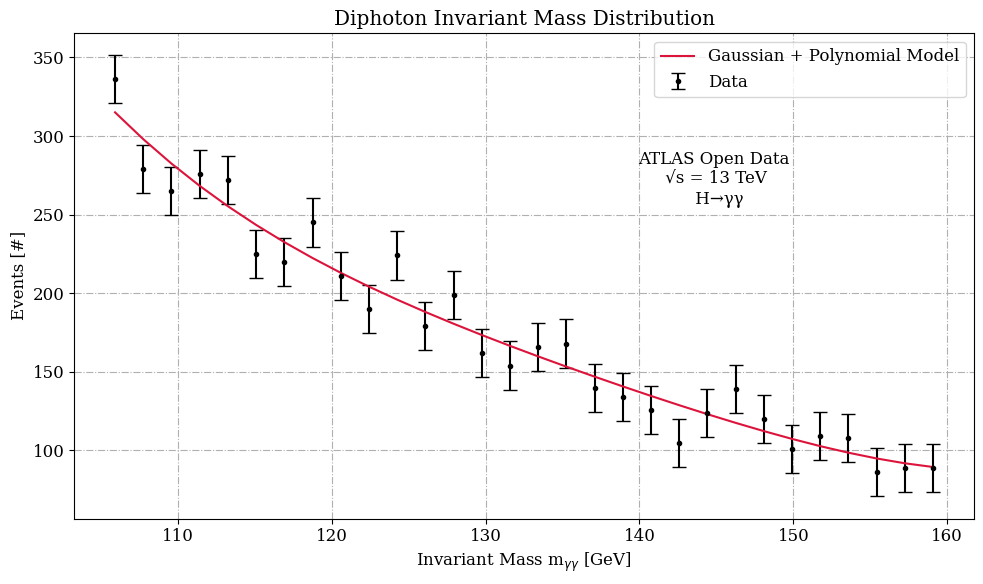

In [25]:
# Importar las librerias
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Obtener los datos de hist en arrays
n_bins = hist.GetNbinsX()
bin_contents = [hist.GetBinContent(i) for i in range(1, n_bins + 1)]
bin_centers = [(hist.GetBinLowEdge(i) + hist.GetBinWidth(i) / 2) for i in range(1, n_bins + 1)]

# Define el modelo para la regresión
def model_function(x, a0, a1, a2, a3, a4, amplitude, mean, stddev):
    return a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

# Halla los coeficientes
p0 = [1, 1, 1, 1, 1, 1, 0, 1]
popt, _ = curve_fit(model_function, bin_centers, bin_contents, p0=p0)

# Setea el tipo de letra y el tamaño
plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

# Plotea los puntos y la regresión
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, bin_contents, yerr=15.29, fmt='.', color='k', ecolor='k', capsize=5, label = "Datos")
plt.plot(bin_centers, model_function(np.array(bin_centers), *popt), color='crimson', label='Modelo Gaussiano + Polinomial')

plt.xlabel('Masa invariante m$_{\gamma\gamma}$ [GeV]')
plt.ylabel('Eventos [#]')
plt.title(r'Distribución de masa invariante de difotones')

# Añade el texto
plt.text(145, 257, 'ATLAS Open Data \n √s = 13 TeV \n H→γγ', fontsize=12, ha='center')  # Use '\n' for newline

plt.grid(linestyle = "-.")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## ¡Finalmente, entendiendo los resultados!

Ahora, entendamos el histograma final:
- Representa la distribución de masa invariante del sistema de difotones detectado en los eventos.
- Un pico de alrededor de 125 GeV en el histograma indica la presencia del bosón de Higgs desintegrándose en dos fotones. Esto se debe a que el bosón de Higgs tiene una masa de aproximadamente 125 GeV, y cuando se desintegra en dos fotones, su masa invariante combinada debería ser aproximadamente igual a la masa del bosón de Higgs.
- El área bajo la curva excluyendo el pico representa el fondo. Estos son otros procesos que también producen pares de fotones pero que no se deben a la desintegración del bosón de Higgs. El trasfondo puede provenir de diversas fuentes, como la aniquilación de quarks y antiquarks u otras desintegraciones de partículas. Puede modelarse (y a menudo se hace) mediante simulaciones de Monte Carlo.

Hemos alcanzado nuestro objetivo de identificar y cuantificar el bosón de Higgs reconociendo su pico característico en medio del caos de fondo. Es como encontrar una aguja en un pajar, pero con las herramientas y técnicas adecuadas, ¡se convierte en una búsqueda emocionante!